<h2>Non-Interacting Particles assignment</h2>

The first system we look at is a system of 10 independent particles, with possible energy levels of -1 and 1.

We compute the energy for each of the 2^10 possible states.

In [185]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Generating all possible states</h3>

When we generate the states, we label them from 0, so the state of a single particle is its label, with a defined energy level. 

(A particle in state 3 may have an energy of -1, for example)

In [187]:
#numStates ** numParticles is the number of possible states
#This method converts the index into a number in base numStates with numParticles digits
def getState(index, numParticles, numStates):
    microstate = np.zeros(numParticles)

    for i in range(np.size(microstate)):
        microstate[np.size(microstate) - i - 1] = index % numStates
        index -= index % numStates
        index = index // numStates

    return microstate    

In [188]:
#Testing this with binary
#for i in range(0, 256):
#    print(getState(i, 8, 2))

#testing in base 3
for i in range(0, 9):
    print(getState(i, 2, 3))

[0. 0.]
[0. 1.]
[0. 2.]
[1. 0.]
[1. 1.]
[1. 2.]
[2. 0.]
[2. 1.]
[2. 2.]


<h3>Computing the energies</h3>

In [190]:
def getEnergy(energyLevels, microstate):
    energy = 0
    for state in microstate:
        energy += energyLevels[state]

    return energy

In [191]:
#Test for system of 8 particles,with states -1 and +1
for i in range(256):
    microstate = getState(i, 4, 2)

    energy = getEnergy({0:-1, 1:1}, microstate)
    print(energy)

-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4


<h2>2 State-System</h2>

We start with energy states -1 and +1 and calculate the energy density over all possible states.

Text(0.5, 1.0, 'Possible Energy Levels for a 2 State System')

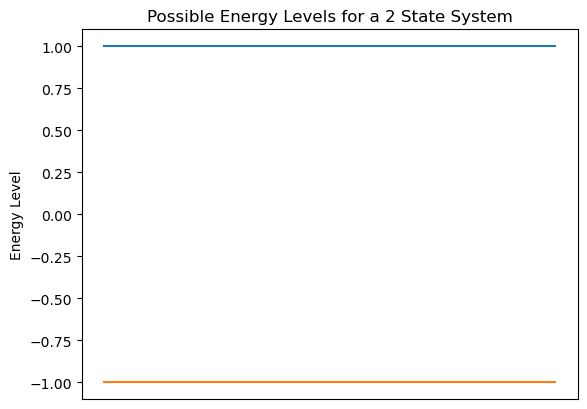

In [193]:
#Energy level diagram
state1 = np.ones(10)
state2 = -np.ones(10)

plt.plot(state1, label="State +1")
plt.plot(state2, label="State -1")
plt.xticks([])
plt.ylabel("Energy Level")
plt.title("Possible Energy Levels for a 2 State System")


In [194]:
def energyDensity(numParticles, numStates, energyLevels, maxEnergy, minEnergy, stepSize):
    energyDensity = np.zeros((maxEnergy-minEnergy)//stepSize + 1)

    for i in range(numStates**numParticles):
        microstate = getState(i, numParticles, numStates)
    
        energy = getEnergy(energyLevels, microstate)
        energyDensity[(energy - minEnergy)//stepSize] += 1

    return energyDensity

Text(0.5, 1.0, 'Energy density for a system of 20 non-interacting particles')

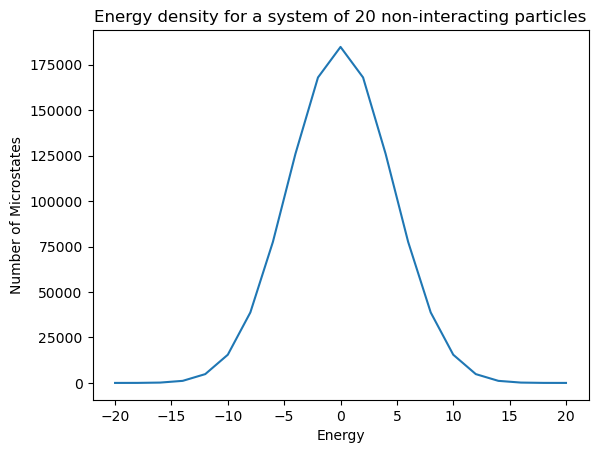

In [195]:
#Min energy = n * min Level
#Max energy = n * max Level

#-10 to 10, with stepsize of 2

density = energyDensity(20, 2, {0:-1, 1:1}, 20, -20, 2)
energies = np.linspace(-20, 20, 21)
plt.plot(energies, density)
plt.xlabel("Energy")
plt.ylabel("Number of Microstates")
plt.title("Energy density for a system of 20 non-interacting particles")

<h2>3 State-System</h2>

We start with energy states -1, +1 and +2 and calculate the energy density over all possible states.

Text(0.5, 1.0, 'Possible Energy Levels for a 3 State System')

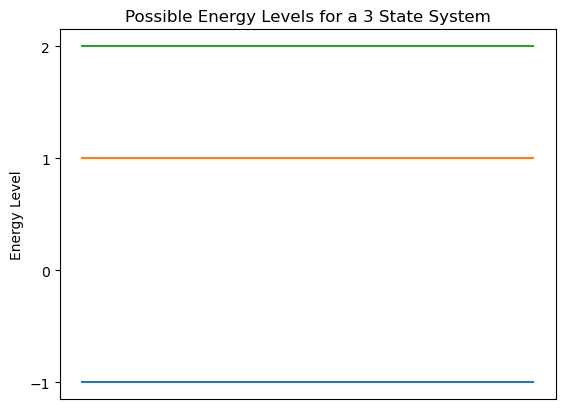

In [222]:
#Energy level diagram
state1 = -1 * np.ones(10)
state2 = np.ones(10)
state3 = 2 * np.ones(10)

plt.plot(state1, label="State -10")
plt.plot(state2, label="State +1")
plt.plot(state3, label="State +10")
plt.xticks([])
plt.yticks([-1, 0, 1, 2])
plt.ylabel("Energy Level")
plt.title("Possible Energy Levels for a 3 State System")

Text(0.5, 1.0, 'Energy density for a system of 12 non-interacting particles')

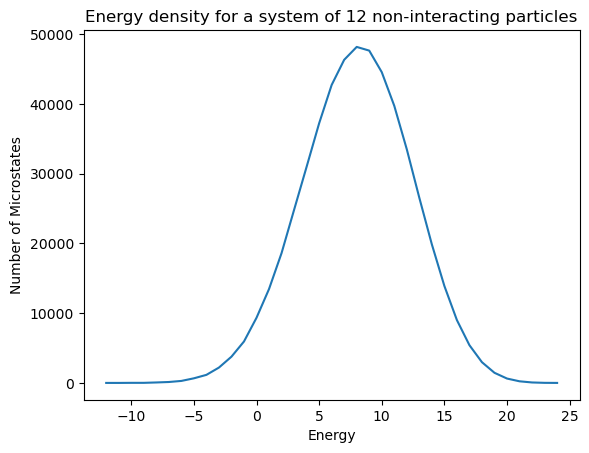

In [224]:
density = energyDensity(12, 3, {0:-1, 1:1, 2:2}, 24, -12, 1)
energies = np.linspace(-12, 24, np.size(density))
plt.plot(energies, density)
plt.xlabel("Energy")
plt.ylabel("Number of Microstates")
plt.title("Energy density for a system of 12 non-interacting particles")

In [199]:
energies

array([-80., -78., -76., -74., -72., -70., -68., -66., -64., -62., -60.,
       -58., -56., -54., -52., -50., -48., -46., -44., -42., -40., -38.,
       -36., -34., -32., -30., -28., -26., -24., -22., -20., -18., -16.,
       -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
         8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,
        30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,
        52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,
        74.,  76.,  78.,  80.])

In [200]:
density

array([  1.,   0.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   8.,
        28.,   0.,   0.,   0.,  56.,  56.,   0.,   0.,   0.,  28., 168.,
        70.,   0.,   0., 168., 280.,  56.,   0.,   0.,  56., 420., 280.,
        28.,   0., 280., 560., 168.,   8.,   0.,  70., 560., 420.,  56.,
         1., 280., 560., 168.,   8.,   0.,  56., 420., 280.,  28.,   0.,
       168., 280.,  56.,   0.,   0.,  28., 168.,  70.,   0.,   0.,  56.,
        56.,   0.,   0.,   0.,   8.,  28.,   0.,   0.,   0.,   8.,   0.,
         0.,   0.,   0.,   1.])